In [2]:
import pandas as pd
import seaborn as sbn

In [4]:
df=pd.read_csv('/Users/suraaj/Downloads/bike_sharing.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [6]:
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [7]:
df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

<AxesSubplot:xlabel='workingday', ylabel='count'>

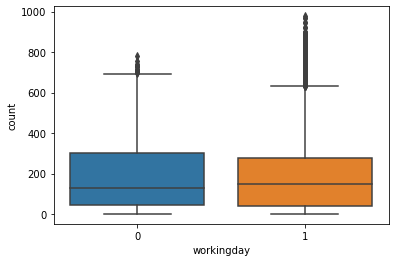

In [8]:
sbn.boxplot(x='workingday', y='count', data =df)

In [9]:
q1=df['count'].quantile(0.25)
q3=df['count'].quantile(0.75)
iqr=q3-q1


In [10]:
df=df[(df['count']>(q1-1.5*iqr) ) & (df['count']<(q3+1.5*iqr))]

In [11]:
df.shape

(10583, 12)

In [12]:
df.workingday.value_counts()

1    7161
0    3422
Name: workingday, dtype: int64

<AxesSubplot:xlabel='workingday', ylabel='count'>

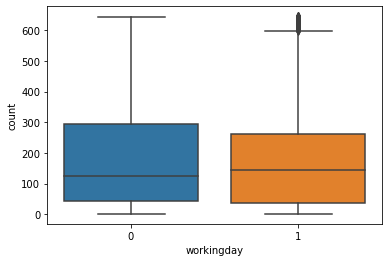

In [13]:
sbn.boxplot(x='workingday', y='count', data =df)

With visual analysis we see that the count doesn't depend much on the working day

Need to check using statistical methods

The t test as compared with z test is its advantage for small sample comparison. As n increases, t approaches to z. The advantage of t test disappears, and t distribution simply becomes z distribution. In other words, with large n. t test is just close to z test. and one don't loose anything to continue to use t test. In the past, for convenience, we use z table when n > 30.  We don't have to do it anymore. In fact, all statistical packages use t test even n is large. This is easy, convenience with computer programming, and is correct. All statistical packages are good references.

Population std is unknown 

## Step 1: Define the null and alternate hypotheses

$H_0:$ The count on weekday is LESS THAN or equal to the count on weekend.

$H_a:$ The count on weekday is greater than count on weekend.

Let $\mu_1$ and $\mu_2$ be the mean time spent by the users on the new and old page respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: \mu_1 <= \mu_2$

$H_a: \mu_1 > \mu_2$

## Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

## Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

## Step 4: Collect and prepare data

In [14]:
weekday = df[df['workingday'] == 1]['count'].sample(3422)
weekend = df[df['workingday'] == 0]['count'].sample(3422)

In [15]:
print('The sample standard deviation of the count on weekday is:', round(weekday.std(),2))
print('The sample standard deviation of the count on weekend is:', round(weekend.std(),2))

The sample standard deviation of the count on weekday is: 152.24
The sample standard deviation of the count on weekend is: 163.78


As the sample standard deviations are different, the population standard deviations may be assumed to be different.

## Step 5: Calculate the p-value

In [16]:
# import the required function
from scipy.stats import ttest_ind
# find the p-value
test_stat, p_value = ttest_ind(weekday, weekend, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.9962219969001282


In [17]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.9962219969001282 is greater than the level of significance, we fail to reject the null hypothesis.


## Is the demand of electric cycles same for different weather?


In [18]:
df.weather.value_counts()

1    6962
2    2770
3     850
4       1
Name: weather, dtype: int64

In [22]:
df=df[~(df['weather']==4)]

In [25]:
w1 = df[df['weather'] == 1]['count'].sample(850)
w2= df[df['weather'] == 2]['count'].sample(850)
w3 = df[df['weather'] == 3]['count'].sample(850)

In [28]:
df.groupby(['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6962.0,187.131140,161.333785,1.0,45.0,153.0,286.0,646.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0


## Step 1: Define the null and alternate hypotheses

$H_0:$ The mean count in different weather are equal.

$H_a:$ The mean count in different weather are different.

## Step 2: Select Appropriate test

This is a problem, concerning three population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Count follows normal distribution

against the alternative hypothesis

>$H_a:$ Count doesn't follow normal distribution



In [40]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro

# find the p-value
w, p_value = shapiro(df['count'].sample(4999)) 
print('The p-value is', p_value)

The p-value is 0.0


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

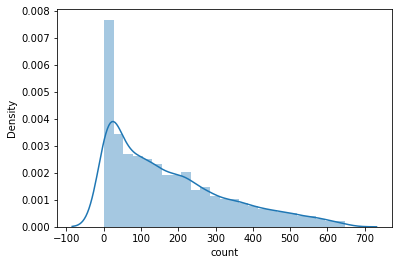

In [48]:

sbn.distplot(df['count'].sample(4999))

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

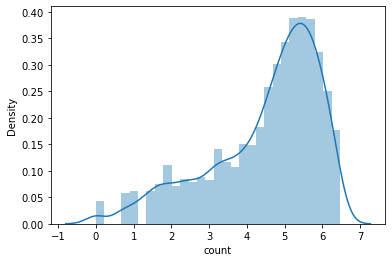

In [41]:
import numpy as np
sbn.distplot(np.log(df['count'].sample(4999)))

Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary


### Levene’s test

We will test the null hypothesis

>$H_0$: All the count variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [42]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( w1, 
                             w2, 
                             w3)
# find the p-value
print('The p-value is', p_value)

The p-value is 5.4137990743466145e-20


In [43]:
p_value>0.05


False

In [44]:
print(w1.var(), w2.var(), w3.var())

26472.897670615952 20337.245844938676 14697.534623432408


# ANOVA


In [45]:
# import the required function
from scipy.stats import f_oneway
# find the p-value
test_stat, p_value = f_oneway(w1,w2,w3)
# print the p-value
print('The p-value is', p_value)

The p-value is 1.457244731807399e-25


In [46]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 1.457244731807399e-25 is less than the level of significance, we reject the null hypothesis.
